In [125]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
G = nx.Graph()

with open('5.graph.txt', 'r') as fin:
    for i in fin.readlines():
        n1, n2, w = i.split()
        G.add_edge(n1, n2, dist=float(w))

In [59]:
betweenness = nx.betweenness_centrality(G, weight='dist')
closeness = nx.closeness_centrality(G, distance='dist')

In [101]:
G_params = pd.DataFrame(betweenness.values(), index=betweenness.keys(), columns=['betweenness'])
G_params['closeness'] = closeness.values()
G_params['closeness_default'] = G_params['closeness'] / (len(G.nodes) - 1)
G_params['bet*clo'] = G_params['betweenness'] * G_params['closeness']
G_params.head(5)

,betweenness,closeness,closeness_default,bet*clo
0,0.000000,0.306526,0.000307,0.000000
32,0.011756,0.365625,0.000366,0.004298
65,0.000000,0.356517,0.000357,0.000000
327,0.007632,0.357903,0.000358,0.002732
679,0.001942,0.348251,0.000349,0.000676


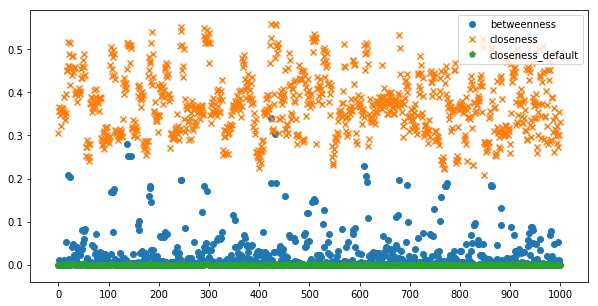

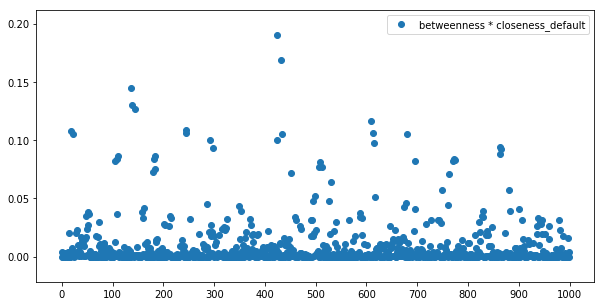

In [127]:
plt.figure(figsize=(10,5))
plt.scatter(betweenness.keys(), betweenness.values(), label='betweenness')
plt.scatter(closeness.keys(), closeness.values(), marker='x', label='closeness')
plt.scatter(closeness.keys(), G_params['closeness_default'].values, marker="p", label='closeness_default')
plt.xticks(np.arange(0, 1100, 100), np.arange(0, 1100, 100))
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(closeness.keys(), G_params['bet*clo'].values, label='betweenness * closeness_default')
plt.xticks(np.arange(0, 1100, 100), np.arange(0, 1100, 100))
plt.legend()
plt.show()

In [126]:
G_params['bet*clo'].argmax()

'55'